# 1. 데이터 전처리

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import platform
from matplotlib import font_manager, rc

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.filterwarnings('ignore')

sns.set(style='whitegrid')

In [3]:
import matplotlib
from matplotlib import font_manager, rc
import platform

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
train = pd.read_csv("C:/RRR/train.csv", index_col=0)
test = pd.read_csv("C:/RRR/test.csv", index_col=0)
sample_submission = pd.read_csv("C:/RRR/sample_submission.csv")

### 데이터 확인

In [5]:
train.shape

(26457, 19)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  object 
 1   car            26457 non-null  object 
 2   reality        26457 non-null  object 
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  object 
 6   edu_type       26457 non-null  object 
 7   family_type    26457 non-null  object 
 8   house_type     26457 non-null  object 
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  FLAG_MOBIL     26457 non-null  int64  
 12  work_phone     26457 non-null  int64  
 13  phone          26457 non-null  int64  
 14  email          26457 non-null  int64  
 15  occyp_type     18286 non-null  object 
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  float64
 18  credit

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 26457 to 36456
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         10000 non-null  object 
 1   car            10000 non-null  object 
 2   reality        10000 non-null  object 
 3   child_num      10000 non-null  int64  
 4   income_total   10000 non-null  float64
 5   income_type    10000 non-null  object 
 6   edu_type       10000 non-null  object 
 7   family_type    10000 non-null  object 
 8   house_type     10000 non-null  object 
 9   DAYS_BIRTH     10000 non-null  int64  
 10  DAYS_EMPLOYED  10000 non-null  int64  
 11  FLAG_MOBIL     10000 non-null  int64  
 12  work_phone     10000 non-null  int64  
 13  phone          10000 non-null  int64  
 14  email          10000 non-null  int64  
 15  occyp_type     6848 non-null   object 
 16  family_size    10000 non-null  float64
 17  begin_month    10000 non-null  float64
dtypes:

In [8]:
train.head(3)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
index,,,,,,,,,,,,,,,,,,,
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0


현재 train은 20개의 컬럼과, 2만개의 로우를 가짐. 
test는 19개의 컬럼, train에만 존재하는 컬럼이 credit. 
이번 대회에서 예측해야 할 값이 바로 credit. 
train과 test에 존재하는 19개의 컬럼을 보고 credit의 갑을 예측 . 
train 데이터를 통해 학습시킴, 학습된 모델을 통해) test에 있는 19개의 컬럼을 입력으로 넣어서  credit을 예측. 
예측된 credt 값은 sample_submission과 동일한 형식이어야 함, 따라서 sample_submission의 형식을 미리 봐둬야 함.  </br>

train 데이터를 통해 모델 학습. 
train에 있는 19개의 컬럼과 1개의 credit이라는 이름의 타겟이 존재. 
우리가 만들 model은 저 19개의 컬럼을 입력 x로 받고, credit이라는 컬럼은 출력 y로. 
사이킷런에서 model.fit(x,y)를 사용해 train 시킬 것임. 

In [9]:
sample_submission

,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0
3,26460,0,0,0
4,26461,0,0,0
...,...,...,...,...
9995,36452,0,0,0
9996,36453,0,0,0
9997,36454,0,0,0
9998,36455,0,0,0


### 중복데이터 제거

In [10]:
# 모든 값이 중복된 사람들의 DataFrame 생성
# 중복 되는 데이터 가져오기
dup_all = train[train.duplicated()]

print("모든 값이 중복되는 데이터 개수:", len(dup_all))
# credit 비율 확인   /// 전체 train의 credit 비율은 64.13 / 23.69 / 12.18
## low 비율이 높다
dup_all.credit.value_counts(normalize=True).mul(100).round(2)

모든 값이 중복되는 데이터 개수: 1634


2.0    69.65
1.0    20.44
0.0     9.91
Name: credit, dtype: float64

In [11]:
# 모든 값이 중복되는 데이터는 하나만 남기고 모두 제거
# 모든 중복 개수 확인
print("제거할 데이터 개수:", train.duplicated().sum())
print("중복 제거 전 shape:", train.shape)

# 복사본 생성
train_df = train.copy()

제거할 데이터 개수: 1634
중복 제거 전 shape: (26457, 19)


In [12]:
unique=(~dup_all.duplicated(keep='first')).sum()
unique    #1634 중 1521개는 고유한 데이터를 가진다. 

1521

In [13]:
unique_dup_all = dup_all[~(dup_all.duplicated(keep='first'))].copy()

In [14]:
train_df.drop_duplicates(inplace=True)
train_df=train_df.append(unique_dup_all, ignore_index = True)
print("모두 중복되는 샘플 제거 후 shape:", train_df.shape)


모두 중복되는 샘플 제거 후 shape: (26344, 19)


In [15]:
train_df

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26339,F,Y,N,0,112500.0,Working,Secondary / secondary special,Married,Municipal apartment,-17372,-978,1,0,1,0,Sales staff,2.0,-15.0,1.0
26340,M,Y,Y,0,247500.0,Working,Secondary / secondary special,Married,House / apartment,-14122,-3383,1,0,0,0,Managers,2.0,-31.0,2.0
26341,F,Y,Y,2,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-12745,-525,1,0,0,1,Core staff,4.0,-23.0,1.0
26342,F,N,Y,0,135000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-16300,-9698,1,0,0,1,Managers,2.0,-41.0,2.0


In [16]:
test.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
index,,,,,,,,,,,,,,,,,,
26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [17]:
#  원하는 한 개의 컬럼을 제외하고 중복되는 데이터 개수 확인하는 함수를 먼저 만듦

def check_duplicate(df, *args):
  check_list = list(set(df.columns.tolist())- set(args))
  
  # 중복되는 데이터 모두 저장하는 데이터 프레임  [boolean Seires]
  dup_pair_df = df.duplicated(subset=check_list, keep=False) # 모든 중복 샘플을 모두 True 처리 
  
  sum_dup = dup_pair_df.sum()# 중복 데이터 개수 확인
  print(f"{args}을(를) 제외하고 중복되는 데이터 개수는", sum_dup, "입니다")
  

  # 중복이 있을 경우 해당 데이터들의 index 반환
  if dup_pair_df.sum() != 0:
    print("중복 데이터 비율:", round((sum_dup/len(df)*100),2))
    print()
    return df.loc[dup_pair_df].index

for i in ['car','reality','child_num','edu_type','house_type','DAYS_EMPLOYED','work_phone','phone','FLAG_MOBIL','occyp_type']:
  check_duplicate(train_df, i)

gen_dup_idx = check_duplicate(train_df, 'gender')
intotal_dup_idx = check_duplicate(train_df, 'income_total')
intype_dup_idx = check_duplicate(train_df, 'income_type')
famtype_dup_idx = check_duplicate(train_df, 'family_type')
DB_dup_idx =  check_duplicate(train_df, 'DAYS_BIRTH')
eml_dup_idx = check_duplicate(train_df, 'email')
fs_dup_idx = check_duplicate(train_df, 'family_size')
bm_dup_idx = check_duplicate(train_df, 'begin_month')
cd_dup_idx = check_duplicate(train_df, 'credit')

('car',)을(를) 제외하고 중복되는 데이터 개수는 3042 입니다
중복 데이터 비율: 11.55

('reality',)을(를) 제외하고 중복되는 데이터 개수는 3042 입니다
중복 데이터 비율: 11.55

('child_num',)을(를) 제외하고 중복되는 데이터 개수는 3042 입니다
중복 데이터 비율: 11.55

('edu_type',)을(를) 제외하고 중복되는 데이터 개수는 3042 입니다
중복 데이터 비율: 11.55

('house_type',)을(를) 제외하고 중복되는 데이터 개수는 3042 입니다
중복 데이터 비율: 11.55

('DAYS_EMPLOYED',)을(를) 제외하고 중복되는 데이터 개수는 3042 입니다
중복 데이터 비율: 11.55

('work_phone',)을(를) 제외하고 중복되는 데이터 개수는 3042 입니다
중복 데이터 비율: 11.55

('phone',)을(를) 제외하고 중복되는 데이터 개수는 3042 입니다
중복 데이터 비율: 11.55

('FLAG_MOBIL',)을(를) 제외하고 중복되는 데이터 개수는 3042 입니다
중복 데이터 비율: 11.55

('occyp_type',)을(를) 제외하고 중복되는 데이터 개수는 3042 입니다
중복 데이터 비율: 11.55

('gender',)을(를) 제외하고 중복되는 데이터 개수는 3046 입니다
중복 데이터 비율: 11.56

('income_total',)을(를) 제외하고 중복되는 데이터 개수는 3044 입니다
중복 데이터 비율: 11.55

('income_type',)을(를) 제외하고 중복되는 데이터 개수는 3046 입니다
중복 데이터 비율: 11.56

('family_type',)을(를) 제외하고 중복되는 데이터 개수는 3044 입니다
중복 데이터 비율: 11.55

('DAYS_BIRTH',)을(를) 제외하고 중복되는 데이터 개수는 3324 입니다
중복 데이터 비율: 12.62

('email',)을(를) 제외하고 중복되는 데이터 개수는 3044 입니

In [18]:
# begin_month 제외 중복데이터만으로 DF 생성
bm_dup = train_df.loc[bm_dup_idx]
print(len(bm_dup))

train_df.drop(bm_dup_idx, inplace=True)
print(train_df.shape)

20262
(6082, 19)


In [19]:
(~bm_dup.drop("begin_month", axis=1).duplicated(keep='first')).sum()

# 18535개의 데이터 중에 고유한 샘플 수는 5811개로 추측할 수 있다.

6017

In [20]:
# 5811개의 고유한 샘플로 추측되는 데이터들로 DataFrame 생성
unique_bm_dup = bm_dup[~(bm_dup.drop("begin_month", axis=1).duplicated(keep='first'))].copy()

train_df=train_df.append(unique_bm_dup, ignore_index = True)
train_df.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
1,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
2,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
3,F,N,Y,2,270000.0,Working,Secondary / secondary special,Married,House / apartment,-13413,-4996,1,0,0,1,High skill tech staff,4.0,-18.0,1.0
4,M,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-19408,-4553,1,0,1,0,Laborers,2.0,-2.0,1.0


In [21]:
## 다른 정보 다 똑같은데 credit만 다르기는 어려울 것으로 판정 -> 오류 중복 데이터로 가정, 중복데이터 삭제하기
## 위 begin_month 처리법과 같은 방식으로 함
## bm 중복 데이터들이 삭제 된 후 새로운 중복 비율을 먼저 알아보자

def check_duplicate2(df, *args):
  check_list = list(set(df.columns.tolist())- set(args))
  
  # 중복되는 데이터 모두 저장하는 데이터 프레임  [boolean Seires]
  dup_pair_df = df.duplicated(subset=check_list, keep=False) # 모든 중복 샘플을 모두 True 처리 
  
  sum_dup = dup_pair_df.sum()# 중복 데이터 개수 확인
  print(f"{args}을(를) 제외하고 중복되는 데이터 개수는", sum_dup, "입니다")
  

  # 중복이 있을 경우 해당 데이터들의 index 반환
  if dup_pair_df.sum() != 0:
    print("중복 데이터 비율:", round((sum_dup/len(df)*100),2))
    print()
    return df.loc[dup_pair_df].index

for i in ['car','reality','child_num','edu_type','house_type','DAYS_EMPLOYED','work_phone','phone','FLAG_MOBIL','occyp_type']:
  check_duplicate(train_df, i)

gen_dup_idx2 = check_duplicate2(train_df, 'gender')
intotal_dup_idx2 = check_duplicate2(train_df, 'income_total')
intype_dup_idx2 = check_duplicate2(train_df, 'income_type')
famtype_dup_idx2= check_duplicate2(train_df, 'family_type')
DB_dup_idx2 =  check_duplicate2(train_df, 'DAYS_BIRTH')
eml_dup_idx2 = check_duplicate2(train_df, 'email')
fs_dup_idx2 = check_duplicate2(train_df, 'family_size')
bm_dup_idx2 = check_duplicate2(train_df, 'begin_month')
cd_dup_idx2= check_duplicate2(train_df, 'credit')

('car',)을(를) 제외하고 중복되는 데이터 개수는 0 입니다
('reality',)을(를) 제외하고 중복되는 데이터 개수는 0 입니다
('child_num',)을(를) 제외하고 중복되는 데이터 개수는 0 입니다
('edu_type',)을(를) 제외하고 중복되는 데이터 개수는 0 입니다
('house_type',)을(를) 제외하고 중복되는 데이터 개수는 0 입니다
('DAYS_EMPLOYED',)을(를) 제외하고 중복되는 데이터 개수는 0 입니다
('work_phone',)을(를) 제외하고 중복되는 데이터 개수는 0 입니다
('phone',)을(를) 제외하고 중복되는 데이터 개수는 0 입니다
('FLAG_MOBIL',)을(를) 제외하고 중복되는 데이터 개수는 0 입니다
('occyp_type',)을(를) 제외하고 중복되는 데이터 개수는 0 입니다
('gender',)을(를) 제외하고 중복되는 데이터 개수는 2 입니다
중복 데이터 비율: 0.02

('income_total',)을(를) 제외하고 중복되는 데이터 개수는 2 입니다
중복 데이터 비율: 0.02

('income_type',)을(를) 제외하고 중복되는 데이터 개수는 2 입니다
중복 데이터 비율: 0.02

('family_type',)을(를) 제외하고 중복되는 데이터 개수는 0 입니다
('DAYS_BIRTH',)을(를) 제외하고 중복되는 데이터 개수는 58 입니다
중복 데이터 비율: 0.48

('email',)을(를) 제외하고 중복되는 데이터 개수는 2 입니다
중복 데이터 비율: 0.02

('family_size',)을(를) 제외하고 중복되는 데이터 개수는 0 입니다
('begin_month',)을(를) 제외하고 중복되는 데이터 개수는 0 입니다
('credit',)을(를) 제외하고 중복되는 데이터 개수는 358 입니다
중복 데이터 비율: 2.96



In [22]:
cd_dup2=train_df.loc[cd_dup_idx2]
print(len(cd_dup2))

train_df.drop(cd_dup_idx2, inplace=True)
train_df.head()

358


,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
1,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
2,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
3,F,N,Y,2,270000.0,Working,Secondary / secondary special,Married,House / apartment,-13413,-4996,1,0,0,1,High skill tech staff,4.0,-18.0,1.0
4,M,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-19408,-4553,1,0,1,0,Laborers,2.0,-2.0,1.0
5,M,N,N,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-19850,-1753,1,0,1,0,NaN,2.0,-35.0,2.0


In [23]:
## 358개의 중복 데이터 중에 고유한 샘플 수도 삭제
(~cd_dup2.drop("credit", axis=1).duplicated(keep="first")).sum()

unique_cd_dup2 = cd_dup2[~(cd_dup2.drop("credit", axis=1).duplicated(keep='first'))].copy()

train_df=train_df.append(unique_cd_dup2, ignore_index = True)

In [24]:
train_df.tail()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
11915,F,N,N,0,67500.0,Working,Secondary / secondary special,Married,House / apartment,-15161,-2087,1,1,0,0,Sales staff,2.0,-47.0,2.0
11916,F,N,Y,0,94500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-24302,365243,1,0,0,0,NaN,1.0,-2.0,1.0
11917,F,Y,N,0,31500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-17762,-7734,1,1,1,0,Cleaning staff,2.0,-34.0,1.0
11918,M,Y,Y,0,360000.0,Working,Higher education,Married,House / apartment,-18670,-5431,1,1,1,0,Managers,2.0,-14.0,2.0
11919,F,N,N,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-18234,-2965,1,1,1,0,Core staff,2.0,-10.0,1.0


In [25]:
test.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
index,,,,,,,,,,,,,,,,,,
26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [26]:
train_df

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
1,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
2,F,N,Y,2,270000.0,Working,Secondary / secondary special,Married,House / apartment,-13413,-4996,1,0,0,1,High skill tech staff,4.0,-18.0,1.0
3,M,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-19408,-4553,1,0,1,0,Laborers,2.0,-2.0,1.0
4,M,N,N,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-19850,-1753,1,0,1,0,NaN,2.0,-35.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11915,F,N,N,0,67500.0,Working,Secondary / secondary special,Married,House / apartment,-15161,-2087,1,1,0,0,Sales staff,2.0,-47.0,2.0
11916,F,N,Y,0,94500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-24302,365243,1,0,0,0,NaN,1.0,-2.0,1.0
11917,F,Y,N,0,31500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-17762,-7734,1,1,1,0,Cleaning staff,2.0,-34.0,1.0
11918,M,Y,Y,0,360000.0,Working,Higher education,Married,House / apartment,-18670,-5431,1,1,1,0,Managers,2.0,-14.0,2.0


### 데이터 조작

In [27]:
# 필요 없거나 사용 어려운 데이터 날리기

train_df.drop(['FLAG_MOBIL', 'occyp_type'], axis=1, inplace= True)
test.drop(['FLAG_MOBIL', 'occyp_type'], axis=1, inplace= True)

# (-)부호를 (+)로 변경
train_df['DAYS_BIRTH'] = train_df.DAYS_BIRTH.apply(lambda x: abs(x))
test['DAYS_BIRTH'] = test.DAYS_BIRTH.apply(lambda x: abs(x))

# 윤년 제외, 소수점이 달을 나타내는 것은 아님
# 나이 변환 함수 생성
def change_birth(value):
    return round(value/365, 6)

# 나이 변환 함수 적용
train['DAYS_BIRTH'] = train.DAYS_BIRTH.apply(change_birth)
test['DAYS_BIRTH'] = test.DAYS_BIRTH.apply(change_birth)

# 년 기준으로 변경하는 함수 선언
def change_begin_mth(value):
    return round(value/12, 2)

# (-)부호를 (+)로 변경
train_df['begin_month'] = train_df.begin_month.apply(lambda x: abs(x))
test['begin_month'] = test.begin_month.apply(lambda x: abs(x))

# 수치 단위 (달->년) 변경
train['begin_month'] = train.begin_month.apply(change_begin_mth)
test['begin_month'] = test.begin_month.apply(change_begin_mth)

# 양수 값은 0으로 변경
train.loc[train['DAYS_EMPLOYED'] == 365243, 'DAYS_EMPLOYED'] = 0
test.loc[test['DAYS_EMPLOYED'] == 365243, 'DAYS_EMPLOYED'] = 0

train_df['DAYS_EMPLOYED'] = train_df.DAYS_EMPLOYED.apply(lambda x: abs(x))
test['DAYS_EMPLOYED'] = test.DAYS_EMPLOYED.apply(lambda x: abs(x))

In [28]:
# 'car', 'reality' 문자형을 숫자형으로 전환
train_df['car'] = train_df['car'].replace(['N','Y'] , [0, 1])
test['car'] = test['car'].replace(['N','Y'] , [0, 1])

train_df['reality'] = train_df['reality'].replace(['N','Y'] , [0, 1])
test['reality'] = test['reality'].replace(['N','Y'] , [0, 1])

In [29]:
# train_df 데이터 확인
train_df.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
0,F,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,2092,0,1,0,2.0,37.0,0.0
1,F,1,1,0,157500.0,State servant,Higher education,Married,House / apartment,15037,2105,0,0,0,2.0,26.0,2.0
2,F,0,1,2,270000.0,Working,Secondary / secondary special,Married,House / apartment,13413,4996,0,0,1,4.0,18.0,1.0
3,M,0,1,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,19408,4553,0,1,0,2.0,2.0,1.0
4,M,0,0,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,19850,1753,0,1,0,2.0,35.0,2.0


In [30]:
# test 데이터 확인
test.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month
index,,,,,,,,,,,,,,,,
26457,M,1,0,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,60.246575,0,0,1,0,2.0,5.00
26458,F,0,1,0,135000.0,State servant,Higher education,Married,House / apartment,51.956164,8671,0,1,0,2.0,3.00
26459,F,0,1,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,43.526027,217,1,1,0,2.0,3.33
26460,M,1,0,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,52.794521,2531,1,0,0,2.0,3.42
26461,F,1,1,0,225000.0,State servant,Higher education,Married,House / apartment,48.827397,9385,1,0,0,2.0,0.67


### 결측치 / 이상치 처리

In [31]:
print(train_df.shape, test.shape)

(11920, 17) (10000, 16)


In [32]:
train_df = train_df[(train_df['family_size'] <= 7)]
train_df = train_df.reset_index(drop=True)

In [33]:
train_df.isnull().sum()

gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
work_phone       0
phone            0
email            0
family_size      0
begin_month      0
credit           0
dtype: int64

In [34]:
test.isnull().sum()

gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
work_phone       0
phone            0
email            0
family_size      0
begin_month      0
dtype: int64

### 파생변수 생성

In [35]:
for df in [train_df]:
    
    df['contact'] = df['phone'] + df["work_phone"]+df["email"]
    df['income_mean'] = df['income_total'] / df['family_size']
    df["asset"]=df["car"]+df["reality"]
    df["employed_rate"]=df["DAYS_EMPLOYED"]/df["DAYS_BIRTH"]
    df["capability"]=df["income_total"]/(df['DAYS_BIRTH']+df["DAYS_EMPLOYED"])
    cols = ['car','reality', 'child_num',"work_phone","phone","email"]
    df.drop(cols, axis=1, inplace=True)

In [36]:
train_df.head()

,gender,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month,credit,contact,income_mean,asset,employed_rate,capability
0,F,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,2092,2.0,37.0,0.0,1,101250.0,1,0.138653,11.786962
1,F,157500.0,State servant,Higher education,Married,House / apartment,15037,2105,2.0,26.0,2.0,0,78750.0,2,0.139988,9.187959
2,F,270000.0,Working,Secondary / secondary special,Married,House / apartment,13413,4996,4.0,18.0,1.0,1,67500.0,1,0.372474,14.666739
3,M,180000.0,Working,Secondary / secondary special,Married,House / apartment,19408,4553,2.0,2.0,1.0,1,90000.0,1,0.234594,7.512207
4,M,180000.0,Working,Secondary / secondary special,Married,House / apartment,19850,1753,2.0,35.0,2.0,1,90000.0,0,0.088312,8.332176


In [37]:
for df in [test]:
    
    df['contact'] = df['phone'] + df["work_phone"]+df["email"]
    df['income_mean'] = df['income_total'] / df['family_size']
    df["asset"]=df["car"]+df["reality"]
    df["employed_rate"]=df["DAYS_EMPLOYED"]/df["DAYS_BIRTH"]
    df["capability"]=df["income_total"]/(df['DAYS_BIRTH']+df["DAYS_EMPLOYED"])
    cols = ['car','reality', 'child_num',"work_phone","phone","email"]
    df.drop(cols, axis=1, inplace=True)

In [38]:
test.head()

,gender,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month,contact,income_mean,asset,employed_rate,capability
index,,,,,,,,,,,,,,,
26457,M,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,60.246575,0,2.0,5.00,1,56250.0,1,0.000000,1867.326068
26458,F,135000.0,State servant,Higher education,Married,House / apartment,51.956164,8671,2.0,3.00,1,67500.0,1,166.890689,15.476405
26459,F,69372.0,Working,Secondary / secondary special,Married,House / apartment,43.526027,217,2.0,3.33,2,34686.0,1,4.985523,266.276659
26460,M,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,52.794521,2531,2.0,3.42,1,56250.0,1,47.940581,43.540614
26461,F,225000.0,State servant,Higher education,Married,House / apartment,48.827397,9385,2.0,0.67,1,112500.0,2,192.207666,23.850341


# 2. 데이터 가공

컬럼들의 그룹을 나누어서 그룹별로 전처리    
기준 :  각 데이터 컬럼들이 가지고 있는 요소의 갯수를 기준으로 함

In [39]:
len(train_df['gender'].unique())    #요소의 갯수가 2개 , F와 M 알 수 있음, 

2

In [40]:
unique_len = train_df.apply(lambda x : len(x.unique()))    
# 유니크한 요소 갯수를 세서 하나의 시리즈 형태로 반환을 해줌

unique_len
## index는 data 컬럼들을 인덱스로 갖고, 유니크한 값들의 수로 채워짐

gender              2
income_total      249
income_type         5
edu_type            5
family_type         5
house_type          6
DAYS_BIRTH       6620
DAYS_EMPLOYED    3469
family_size         7
begin_month        61
credit              3
contact             4
income_mean       357
asset               3
employed_rate    8528
capability       8489
dtype: int64

In [41]:
# 2개 이하
# 2개 초과 10개 이하
# 10개 초과
## 로 그룹 나누어 보자

In [42]:
group1=unique_len[unique_len <=2].index   #2개 이하인 컬럼들의 이름이 나온다
group1

Index(['gender'], dtype='object')

In [43]:
group2=unique_len[(unique_len >2)&(unique_len <=10)].index
group2

Index(['income_type', 'edu_type', 'family_type', 'house_type', 'family_size',
       'credit', 'contact', 'asset'],
      dtype='object')

In [44]:
group3=unique_len[unique_len > 10].index 
group3

Index(['income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month',
       'income_mean', 'employed_rate', 'capability'],
      dtype='object')

### ((group1))

In [45]:
train_df['gender'].unique()

array(['F', 'M'], dtype=object)

In [46]:
## 모델 학습에 바로 사용하기 위해 이진변수로 변환
for data in [train_df,test]:
    data['gender'] = data['gender'].replace(['F','M'], [0,1])

In [47]:
# 확인
print(train_df.gender.head())
print(test.gender.head())

0    0
1    0
2    0
3    1
4    1
Name: gender, dtype: int64
index
26457    1
26458    0
26459    0
26460    1
26461    0
Name: gender, dtype: int64


### ((group2))

In [48]:
## 2번째 그룹 전처리 , 숫자도 있고 문자도 있음
train_df[group2].head()

,income_type,edu_type,family_type,house_type,family_size,credit,contact,asset
0,Commercial associate,Secondary / secondary special,Married,House / apartment,2.0,0.0,1,1
1,State servant,Higher education,Married,House / apartment,2.0,2.0,0,2
2,Working,Secondary / secondary special,Married,House / apartment,4.0,1.0,1,1
3,Working,Secondary / secondary special,Married,House / apartment,2.0,1.0,1,1
4,Working,Secondary / secondary special,Married,House / apartment,2.0,2.0,1,0


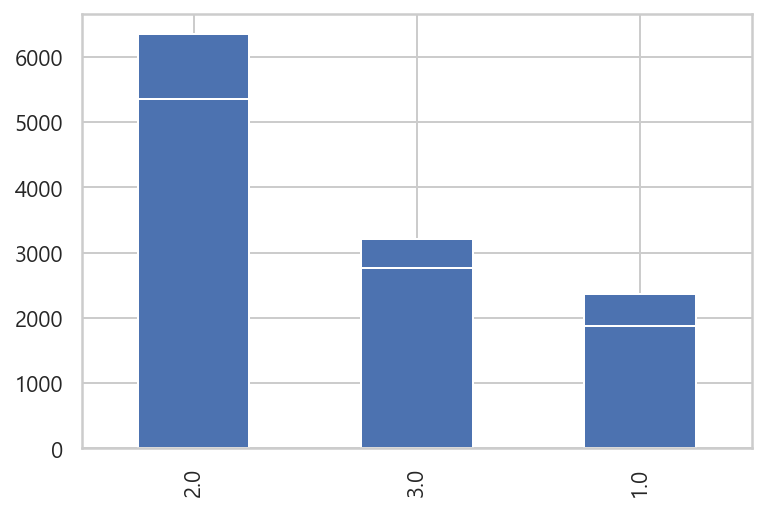

In [49]:
## family_size

## 값들이 거의 없는 것들을 이상치로 취급하고 전처리 해준다
# 지금은 3보다 큰 값은 모두 3로 바꾸는 전처리를 할 것
for data in [train_df,test]:
    data.loc[data['family_size']>3,"family_size"] =3
    
    ## family_size 가 0,1,2,3 로만 값을 갖도록 전처리 함!!
    data['family_size'].value_counts().plot.bar() 

In [50]:
## 나머지 categorical  변수 인코딩 하기

from sklearn import preprocessing  
label_encoder=preprocessing.LabelEncoder()
## 문자로 된 변수들을 숫자로 인코딩해주는 인코더임!    

In [51]:
for data in [train_df,test]:
    data['income_type']=label_encoder.fit_transform(data['income_type'])
    data['edu_type']=label_encoder.fit_transform(data['edu_type'])
    data['family_type']=label_encoder.fit_transform(data['family_type'])
    data['house_type']=label_encoder.fit_transform(data['house_type'])

In [52]:
# 확인
train_df.head()

,gender,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month,credit,contact,income_mean,asset,employed_rate,capability
0,0,202500.0,0,4,1,1,15088,2092,2.0,37.0,0.0,1,101250.0,1,0.138653,11.786962
1,0,157500.0,2,1,1,1,15037,2105,2.0,26.0,2.0,0,78750.0,2,0.139988,9.187959
2,0,270000.0,4,4,1,1,13413,4996,3.0,18.0,1.0,1,67500.0,1,0.372474,14.666739
3,1,180000.0,4,4,1,1,19408,4553,2.0,2.0,1.0,1,90000.0,1,0.234594,7.512207
4,1,180000.0,4,4,1,1,19850,1753,2.0,35.0,2.0,1,90000.0,0,0.088312,8.332176


In [53]:
# 확인
test.head()

,gender,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month,contact,income_mean,asset,employed_rate,capability
index,,,,,,,,,,,,,,,
26457,1,112500.0,1,4,0,1,60.246575,0,2.0,5.00,1,56250.0,1,0.000000,1867.326068
26458,0,135000.0,2,1,1,1,51.956164,8671,2.0,3.00,1,67500.0,1,166.890689,15.476405
26459,0,69372.0,4,4,1,1,43.526027,217,2.0,3.33,2,34686.0,1,4.985523,266.276659
26460,1,112500.0,0,4,1,1,52.794521,2531,2.0,3.42,1,56250.0,1,47.940581,43.540614
26461,0,225000.0,2,1,1,1,48.827397,9385,2.0,0.67,1,112500.0,2,192.207666,23.850341


### ((group3))

In [54]:
## 요소의 갯수가 너무 많으면 모델이 정확한 특징을 찾기 힘들다
## 더 좋은 성능을 위해 구간화 하여 전처리

In [55]:
counts, bin_dividers = np.histogram(data['income_total'], bins=7)

for data in [train_df,test]:
    pd.cut(data['income_total'], bins=bin_dividers , labels=[0,1,2,3,4,5,6])
## 각 구간(,)으로 인코딩 -> labels로 0,1,2..로 인코딩
    pd.cut(data['income_total'], bins=bin_dividers , include_lowest = True, labels=[0,1,2,3,4,5,6])
## 구간에 대한 분절점 포함시킴, 모든 값 해당하도록
    data['income_total']= pd.factorize(pd.cut(data['income_total'], 
                                              bins=bin_dividers , 
                                              include_lowest = True,
                                              labels=[i for i in range(7)]))[0]
## 카테고리라는 데이퍼타입은 시리즈와는 다름, 수정 필요

In [56]:
def make_bin(array,n):
    array= -array
    _, bin_dividers = np.histogram(array, bins=n)     ## counters는 사용하지 않는 변수, 언더바로 표시
    cut_categories = pd.cut(array, bin_dividers, labels=[i for i in range(n)], include_lowest = True)
    bined_array=pd.factorize(cut_categories)[0]
    return bined_array
    

In [57]:
for data in [train_df,test]:
    pd.Series(make_bin(data['DAYS_BIRTH'] , 10)).value_counts()
##  array를 series로 변환  
    data['DAYS_BIRTH'] = make_bin(data['DAYS_BIRTH'], 10)
    data['DAYS_EMPLOYED'] = make_bin(data['DAYS_EMPLOYED'], 6)
    data['begin_month'] = make_bin(data['begin_month'], 4)

In [58]:
def make_bin1(array,n):
    _, bin_dividers = np.histogram(array, bins=n)     ## counters는 사용하지 않는 변수, 언더바로 표시
    cut_categories = pd.cut(array, bin_dividers, labels=[i for i in range(n)], include_lowest = True)
    bined_array=pd.factorize(cut_categories)[0]
    return bined_array

In [59]:
for data in [train_df,test]:
    data['income_mean'] = make_bin1(data['income_mean'], 7)
    data['capability'] = make_bin1(data['capability'], 10)
    data['employed_rate'] = make_bin1(data['employed_rate'], 30)

In [60]:
# 확인
train_df.head()

,gender,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month,credit,contact,income_mean,asset,employed_rate,capability
0,0,0,0,4,1,1,0,0,2.0,0,0.0,1,0,1,0,0
1,0,0,2,1,1,1,0,0,2.0,1,2.0,0,0,2,0,0
2,0,1,4,4,1,1,1,0,3.0,1,1.0,1,0,1,0,1
3,1,0,4,4,1,1,2,0,2.0,2,1.0,1,0,1,0,0
4,1,0,4,4,1,1,2,0,2.0,0,2.0,1,0,0,0,0


In [61]:
# 확인
test.head()

,gender,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month,contact,income_mean,asset,employed_rate,capability
index,,,,,,,,,,,,,,,
26457,1,0,1,4,0,1,0,0,2.0,0,1,0,1,0,0
26458,0,0,2,1,1,1,1,1,2.0,1,1,0,1,1,1
26459,0,0,4,4,1,1,2,0,2.0,1,2,0,1,0,1
26460,1,0,0,4,1,1,1,0,2.0,1,1,0,1,2,1
26461,0,0,2,1,1,1,3,1,2.0,2,1,0,2,3,1


### 데이터 정리

In [68]:
y_train = pd.DataFrame(train_df['credit'])
X_train = pd.DataFrame(train_df.drop('credit',axis=1))

X_test = test

In [63]:
y_train.head()

,credit
0,0.0
1,2.0
2,1.0
3,1.0
4,2.0


In [64]:
X_train.head()

,gender,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month,contact,income_mean,asset,employed_rate,capability
0,0,0,0,4,1,1,0,0,2.0,0,1,0,1,0,0
1,0,0,2,1,1,1,0,0,2.0,1,0,0,2,0,0
2,0,1,4,4,1,1,1,0,3.0,1,1,0,1,0,1
3,1,0,4,4,1,1,2,0,2.0,2,1,0,1,0,0
4,1,0,4,4,1,1,2,0,2.0,0,1,0,0,0,0


In [65]:
X_test.head()

,gender,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month,contact,income_mean,asset,employed_rate,capability
index,,,,,,,,,,,,,,,
26457,1,0,1,4,0,1,0,0,2.0,0,1,0,1,0,0
26458,0,0,2,1,1,1,1,1,2.0,1,1,0,1,1,1
26459,0,0,4,4,1,1,2,0,2.0,1,2,0,1,0,1
26460,1,0,0,4,1,1,1,0,2.0,1,1,0,1,2,1
26461,0,0,2,1,1,1,3,1,2.0,2,1,0,2,3,1


# 2. EDA

In [83]:
X_train.shape

(11917, 15)

In [84]:
X_test.shape

(10000, 15)

In [91]:
X_test.columns

Index(['gender', 'income_total', 'income_type', 'edu_type', 'family_type',
       'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'family_size',
       'begin_month', 'contact', 'income_mean', 'asset', 'employed_rate',
       'capability'],
      dtype='object')

In [89]:
X_train.head()

,gender,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month,contact,income_mean,asset,employed_rate,capability
0,0,0,0,4,1,1,0,0,2.0,0,1,0,1,0,0
1,0,0,2,1,1,1,0,0,2.0,1,0,0,2,0,0
2,0,1,4,4,1,1,1,0,3.0,1,1,0,1,0,1
3,1,0,4,4,1,1,2,0,2.0,2,1,0,1,0,0
4,1,0,4,4,1,1,2,0,2.0,0,1,0,0,0,0


In [85]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11917 entries, 0 to 11916
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         11917 non-null  int64  
 1   income_total   11917 non-null  int64  
 2   income_type    11917 non-null  int32  
 3   edu_type       11917 non-null  int32  
 4   family_type    11917 non-null  int32  
 5   house_type     11917 non-null  int32  
 6   DAYS_BIRTH     11917 non-null  int64  
 7   DAYS_EMPLOYED  11917 non-null  int64  
 8   family_size    11917 non-null  float64
 9   begin_month    11917 non-null  int64  
 10  contact        11917 non-null  int64  
 11  income_mean    11917 non-null  int64  
 12  asset          11917 non-null  int64  
 13  employed_rate  11917 non-null  int64  
 14  capability     11917 non-null  int64  
dtypes: float64(1), int32(4), int64(10)
memory usage: 1.2 MB


In [86]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 26457 to 36456
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         10000 non-null  int64  
 1   income_total   10000 non-null  int64  
 2   income_type    10000 non-null  int32  
 3   edu_type       10000 non-null  int32  
 4   family_type    10000 non-null  int32  
 5   house_type     10000 non-null  int32  
 6   DAYS_BIRTH     10000 non-null  int64  
 7   DAYS_EMPLOYED  10000 non-null  int64  
 8   family_size    10000 non-null  float64
 9   begin_month    10000 non-null  int64  
 10  contact        10000 non-null  int64  
 11  income_mean    10000 non-null  int64  
 12  asset          10000 non-null  int64  
 13  employed_rate  10000 non-null  int64  
 14  capability     10000 non-null  int64  
dtypes: float64(1), int32(4), int64(10)
memory usage: 1.1 MB


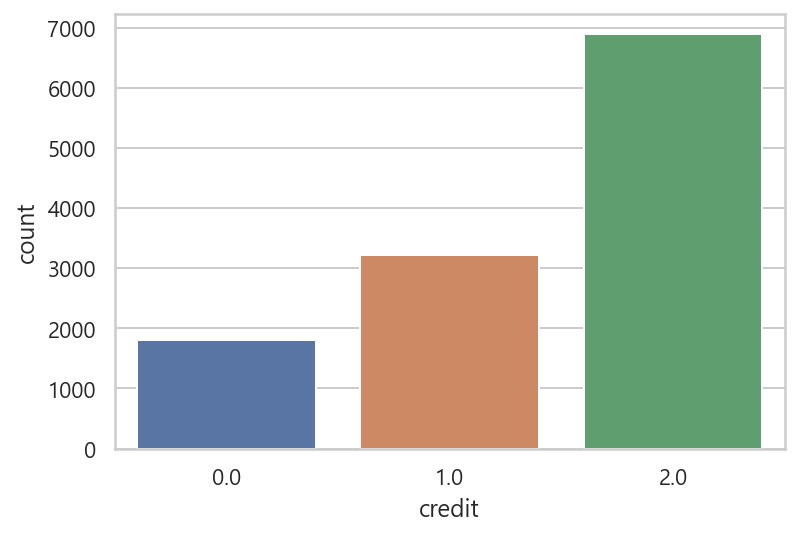

In [69]:
ax=plt.subplots()
ax=sns.countplot(y_train['credit'])

<AxesSubplot:>

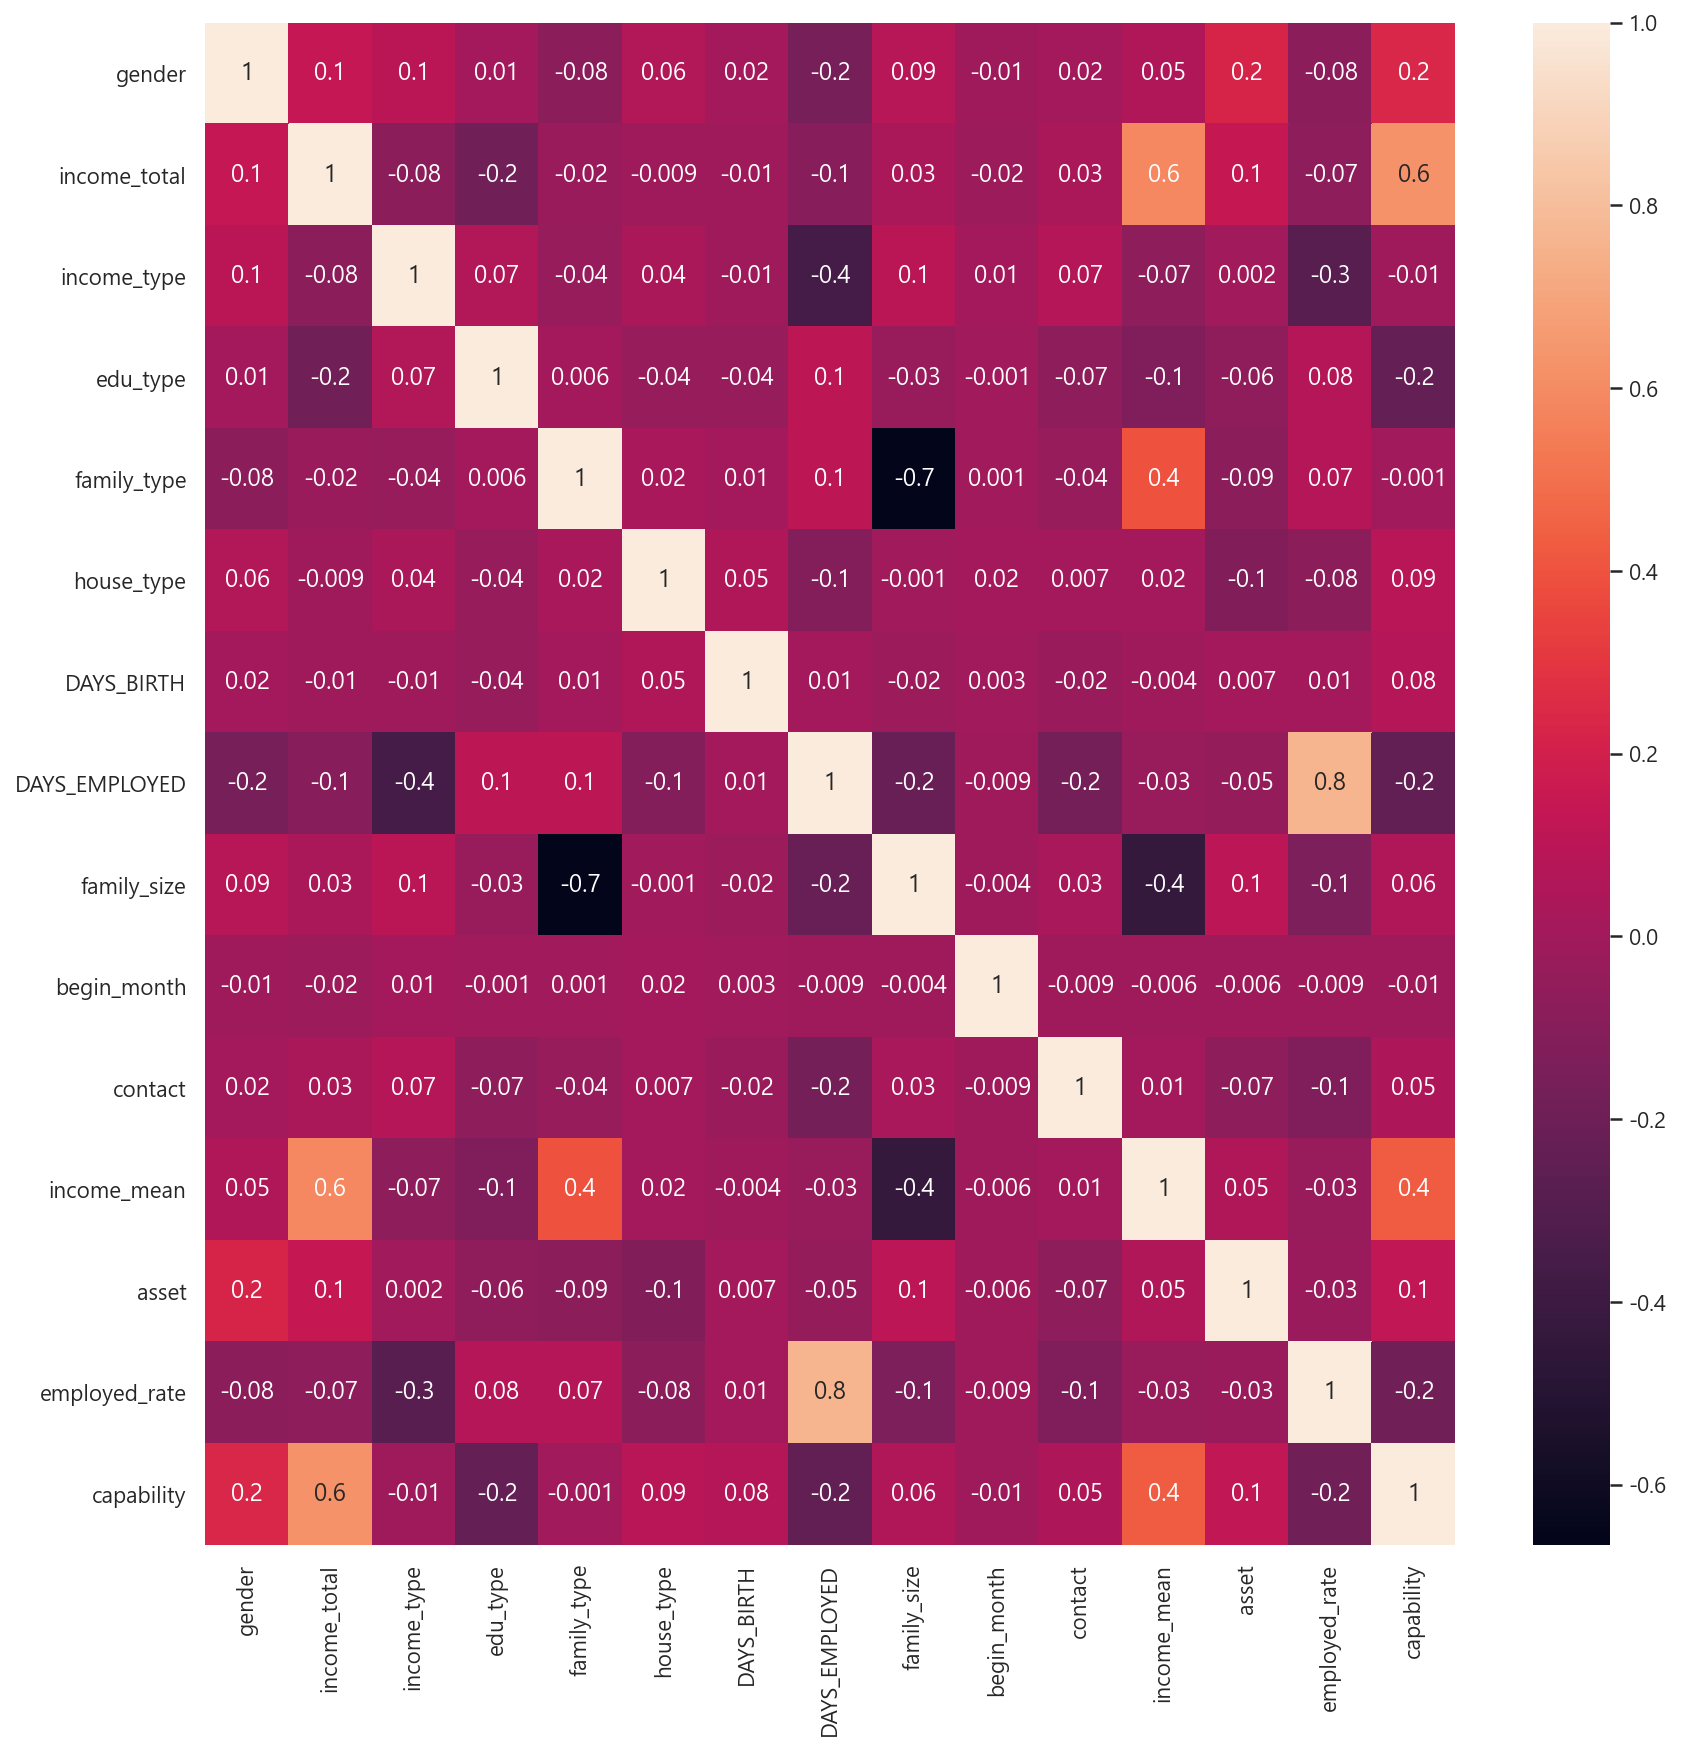

In [70]:
corr=X_train.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True,fmt='.1g')

### 개별 변수 분포 확인

<AxesSubplot:xlabel='income_type', ylabel='count'>

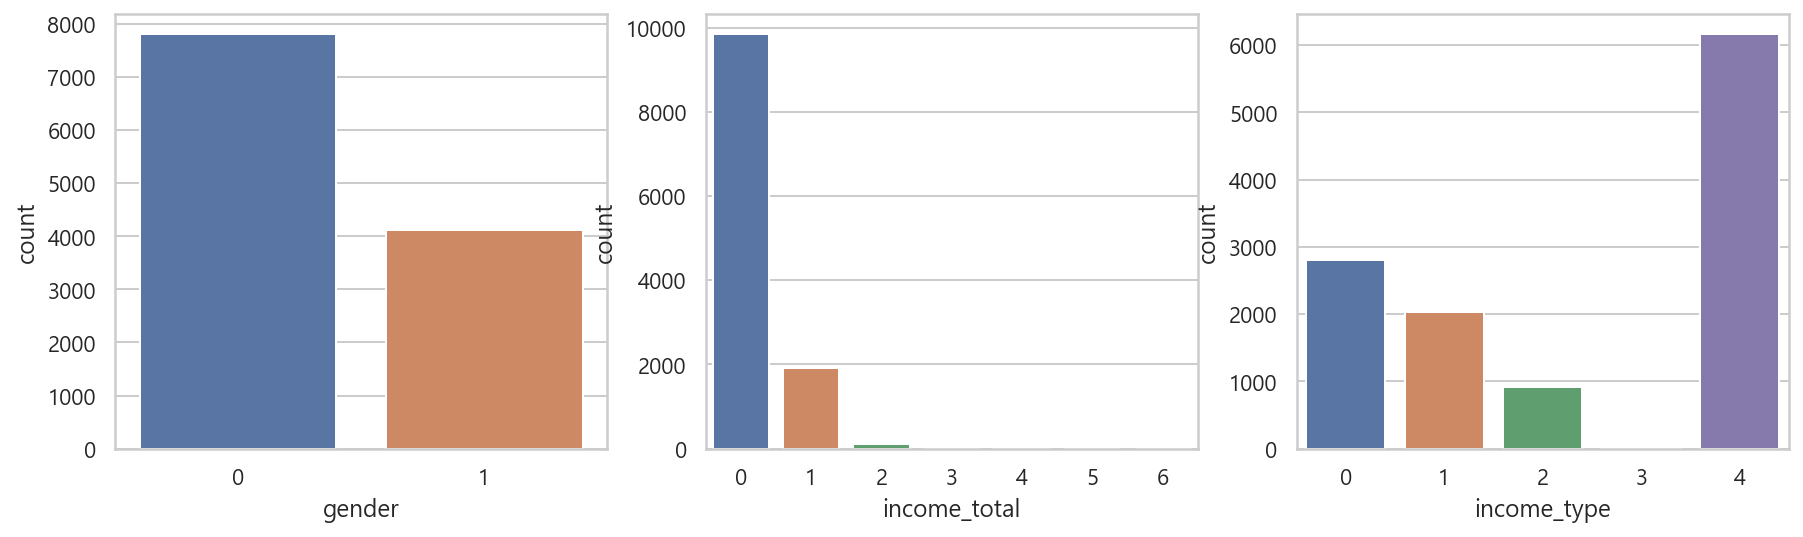

In [71]:
fig,ax=plt.subplots(figsize=(15,4),nrows=1,ncols=3)
sns.countplot(x='gender',data=X_train,ax=ax[0])
sns.countplot(x='income_total',data=X_train,ax=ax[1])
sns.countplot(x='income_type',data=X_train,ax=ax[2])

<AxesSubplot:xlabel='house_type', ylabel='count'>

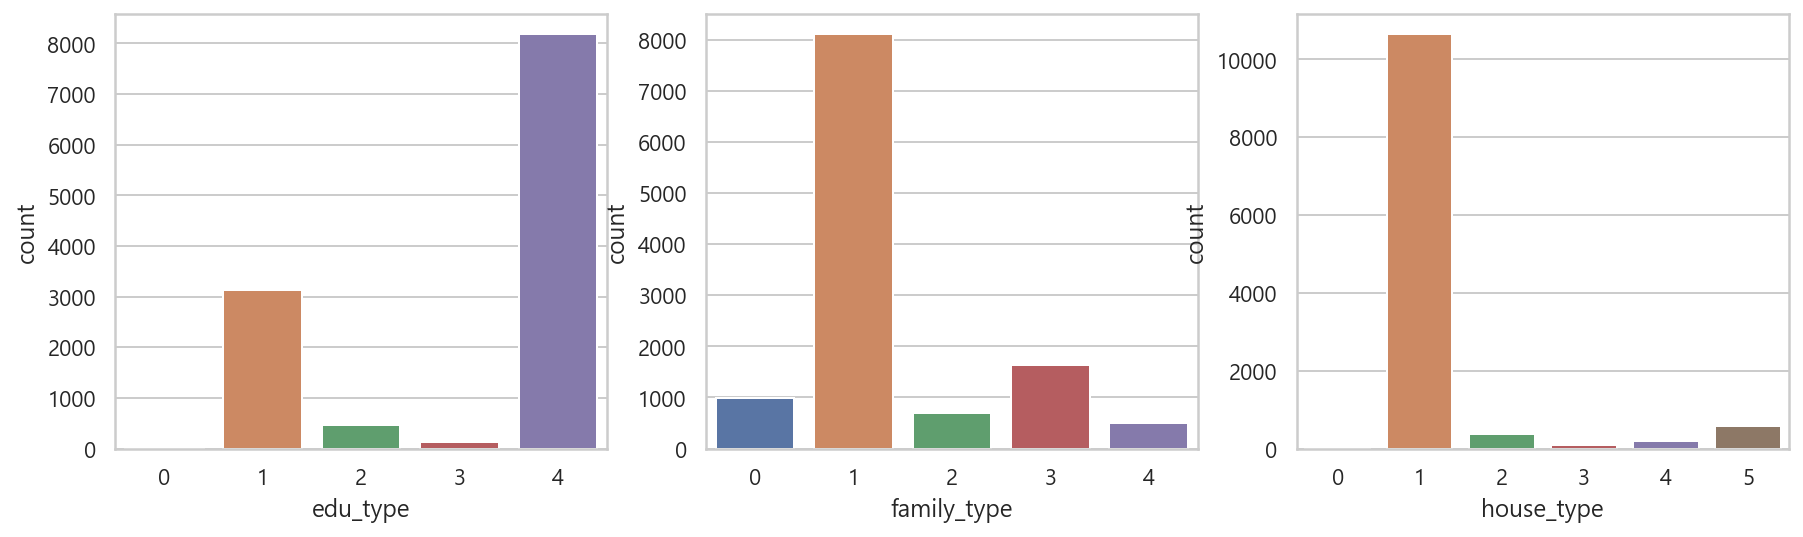

In [75]:
fig,ax=plt.subplots(figsize=(15,4),nrows=1,ncols=3)
sns.countplot(x='edu_type',data=X_train,ax=ax[0])
sns.countplot(x='family_type',data=X_train,ax=ax[1])
sns.countplot(x='house_type',data=X_train,ax=ax[2])

<AxesSubplot:xlabel='family_size', ylabel='count'>

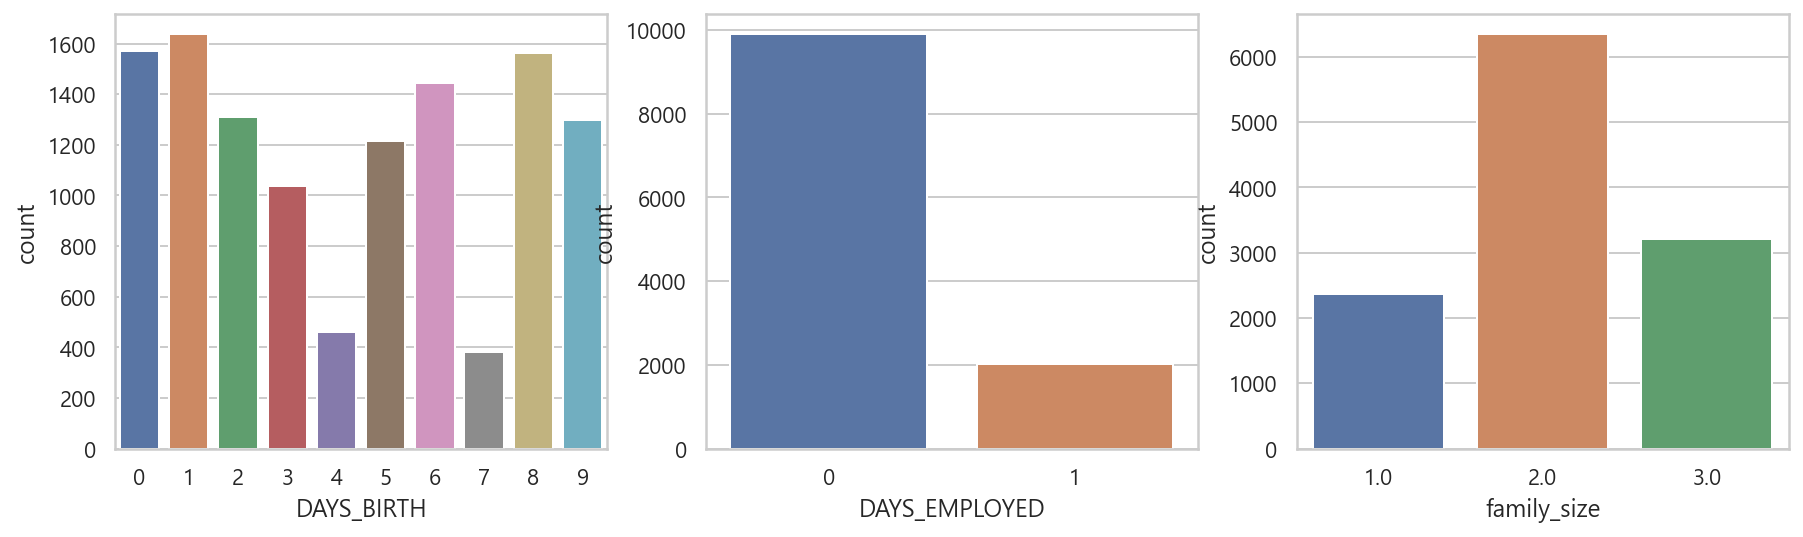

In [76]:
fig,ax=plt.subplots(figsize=(15,4),nrows=1,ncols=3)
sns.countplot(x='DAYS_BIRTH',data=X_train,ax=ax[0])
sns.countplot(x='DAYS_EMPLOYED',data=X_train,ax=ax[1])
sns.countplot(x='family_size',data=X_train,ax=ax[2])

In [77]:
X_train['DAYS_BIRTH'].value_counts()

1    1636
0    1569
8    1564
6    1446
2    1311
9    1298
5    1215
3    1038
4     460
7     380
Name: DAYS_BIRTH, dtype: int64

<AxesSubplot:xlabel='asset', ylabel='count'>

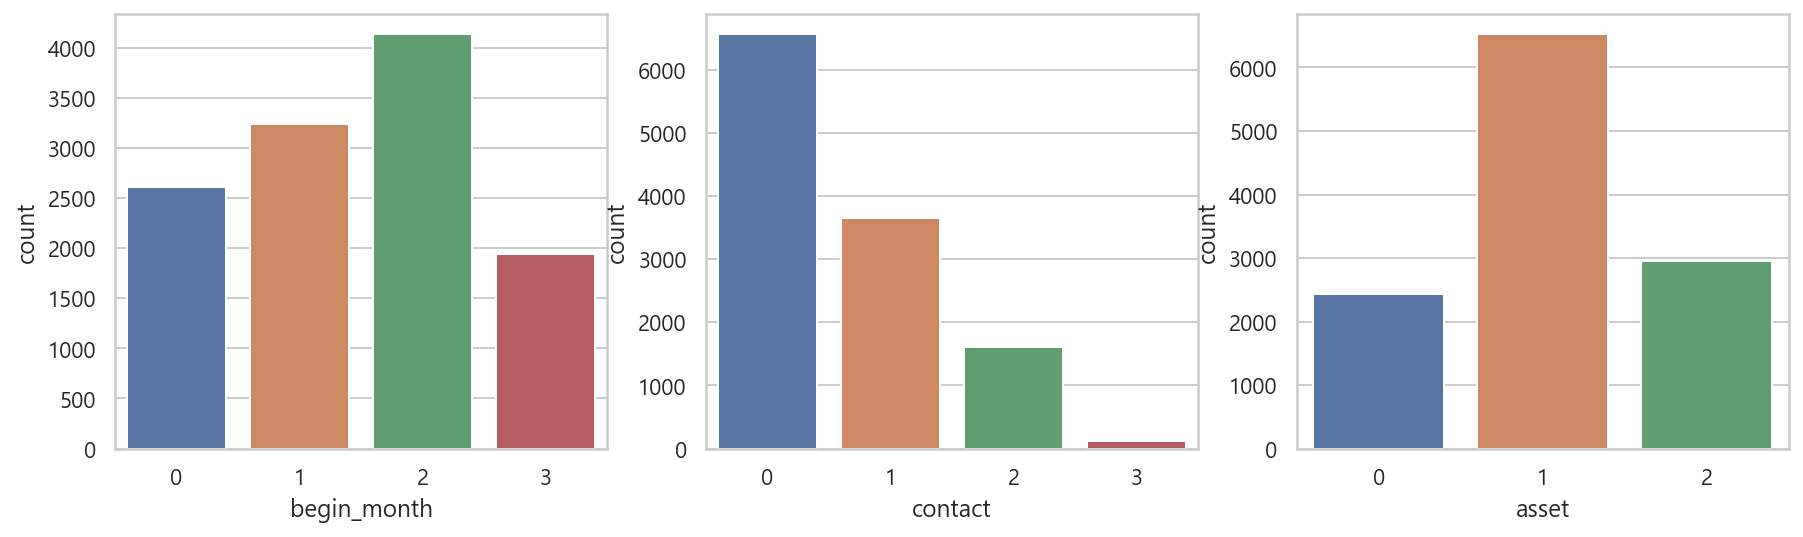

In [78]:
fig,ax=plt.subplots(figsize=(15,4),nrows=1,ncols=3)
sns.countplot(x='begin_month',data=X_train,ax=ax[0])
sns.countplot(x='contact',data=X_train,ax=ax[1])
sns.countplot(x='asset',data=X_train,ax=ax[2])

<AxesSubplot:xlabel='capability', ylabel='count'>

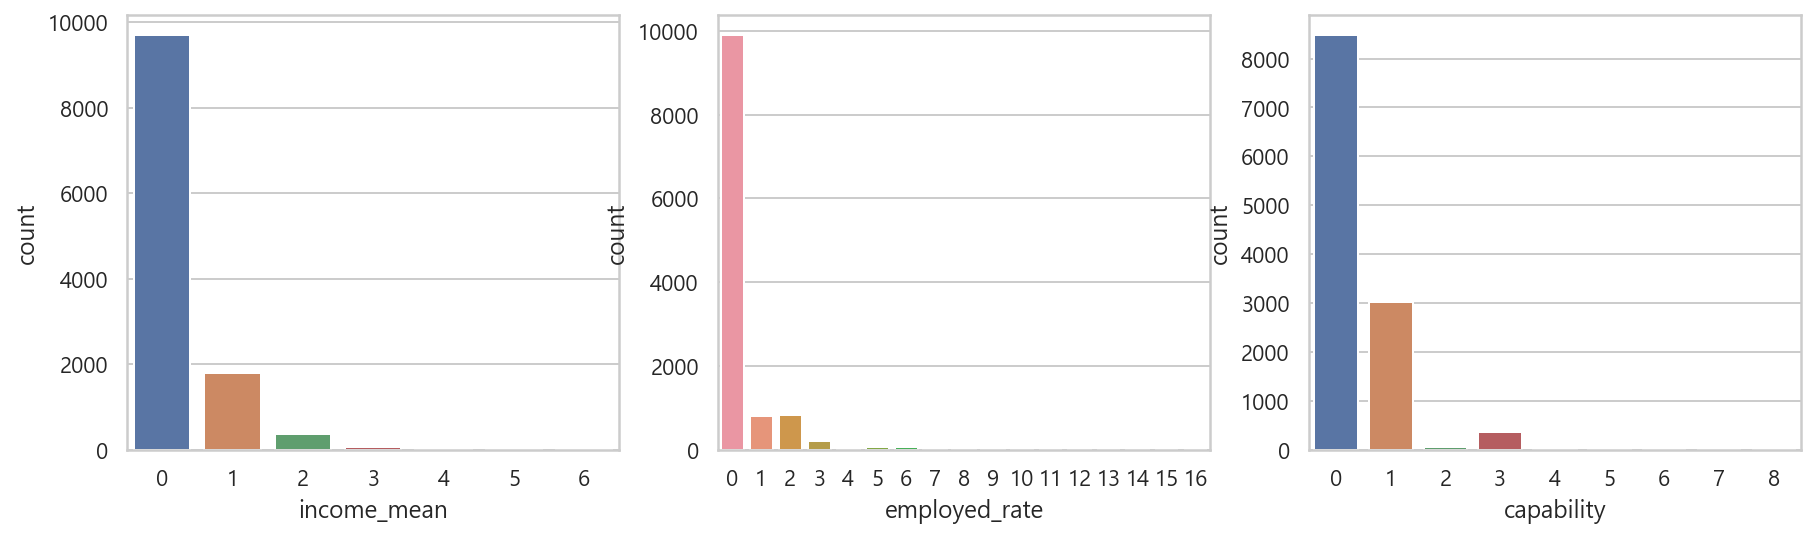

In [79]:
fig,ax=plt.subplots(figsize=(15,4),nrows=1,ncols=3)
sns.countplot(x='income_mean',data=X_train,ax=ax[0])
sns.countplot(x='employed_rate',data=X_train,ax=ax[1])
sns.countplot(x='capability',data=X_train,ax=ax[2])

In [80]:
X_train['income_mean'].value_counts()

0    9692
1    1789
2     355
3      58
5      10
6      10
4       3
Name: income_mean, dtype: int64

In [81]:
X_train['employed_rate'].value_counts()

0     9890
2      816
1      813
3      212
5       60
6       54
4       32
9       13
7       10
14       3
8        3
12       3
11       2
13       2
15       2
10       1
16       1
Name: employed_rate, dtype: int64

In [82]:
X_train['capability'].value_counts()

0    8472
1    3021
3     355
2      56
4       6
5       3
6       2
8       1
7       1
Name: capability, dtype: int64

# 3. 학습

### KFold

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 분리
train_X, val_X, train_y, val_y = train_test_split(X_train,y_train, stratify=y_train,test_size=0.2,random_state=121)

train_X = StandardScaler().fit_transform(train_X)
val_X = StandardScaler().fit_transform(val_X)

In [93]:
## ver1.

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
parameters={'max_depth':[1,2,3,4,5],'min_samples_split':[2,3,4,5]}
grid_clf = GridSearchCV(clf,param_grid=parameters,cv=5,refit=True)

grid_clf.fit(train_X,train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5]})

In [94]:
print('GridSearchCV 최적 파라미터: ',grid_clf.best_params_)

GridSearchCV 최적 파라미터:  {'max_depth': 1, 'min_samples_split': 2}


In [95]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score,cross_validate

clf=RandomForestClassifier()
scores=cross_val_score(clf,train_X,train_y,scoring='accuracy',cv=2)
print('교차 검증별 정확도:',np.round(scores,4))
print('평균 검증 정확도:',np.round(np.mean(scores),4))

교차 검증별 정확도: [0.4928 0.4964]
평균 검증 정확도: 0.4946


# 4. 모델 학습

### ((Light GBM))

In [97]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

In [98]:
# train_X, val_X, train_y, val_y = train_test_split

model = LGBMClassifier()
model.fit(train_X, train_y)

y_lr = model.predict_proba(val_X)

# log loss 값 계산
print(log_loss(val_y,y_lr))

0.9888708096382647


In [99]:
# train_X, val_X, train_y, val_y = train_test_split

evals = [(val_X, val_y)]

lgbm_wrapper = LGBMClassifier(n_estimators=500)


param_grid = {
    'num_leaves':[10,100,200],
    'boosting_type':['gbdt'],
    'learning_rate':[0.5, 0.1, 0.001],
    'objective':['multiclass'],
    'max_depth':[5,10,20]
}

GS = GridSearchCV(estimator=lgbm_wrapper, param_grid=param_grid)

GS.fit(train_X, train_y, 
       early_stopping_rounds=100, 
      eval_metric='logloss',
      eval_set=evals,
      verbose=True)

# 돌아가는데 시간 오래 걸려요!

[1]	valid_0's multi_logloss: 0.939521
[2]	valid_0's multi_logloss: 0.938105
[3]	valid_0's multi_logloss: 0.939995
[4]	valid_0's multi_logloss: 0.941418
[5]	valid_0's multi_logloss: 0.94257
[6]	valid_0's multi_logloss: 0.945429
[7]	valid_0's multi_logloss: 0.946645
[8]	valid_0's multi_logloss: 0.948971
[9]	valid_0's multi_logloss: 0.949977
[10]	valid_0's multi_logloss: 0.952033
[11]	valid_0's multi_logloss: 0.953359
[12]	valid_0's multi_logloss: 0.954893
[13]	valid_0's multi_logloss: 0.955823
[14]	valid_0's multi_logloss: 0.9573
[15]	valid_0's multi_logloss: 0.958611
[16]	valid_0's multi_logloss: 0.959717
[17]	valid_0's multi_logloss: 0.960347
[18]	valid_0's multi_logloss: 0.961179
[19]	valid_0's multi_logloss: 0.962883
[20]	valid_0's multi_logloss: 0.964856
[21]	valid_0's multi_logloss: 0.96607
[22]	valid_0's multi_logloss: 0.967252
[23]	valid_0's multi_logloss: 0.968556
[24]	valid_0's multi_logloss: 0.96936
[25]	valid_0's multi_logloss: 0.971465
[26]	valid_0's multi_logloss: 0.972227


GridSearchCV(estimator=LGBMClassifier(n_estimators=500),
             param_grid={'boosting_type': ['gbdt'],
                         'learning_rate': [0.5, 0.1, 0.001],
                         'max_depth': [5, 10, 20], 'num_leaves': [10, 100, 200],
                         'objective': ['multiclass']})

<결과 예시>    

GridSearchCV(estimator=LGBMClassifier(n_estimators=500), <br>
             param_grid={'boosting_type': ['gbdt'], <br>
                         'learning_rate': [0.5, 0.1, 0.001],<br>
                         'max_depth': [5, 10, 20], <br>
                         'num_leaves': [10, 100, 200],<br>
                         'objective': ['multiclass']}) <br>
                         
<logloss값 예시> <br>
valid_0's multi_logloss: 0.939393

In [100]:
# 정확도 
GS.best_score_

0.5784117827345104

In [101]:
# 여러 오차 측정 지표

def get_clf_eval(y_test, pred=None, pred_proba=None): 
    confusion = confusion_matrix(y_test, pred) 
    accuracy = accuracy_score(y_test, pred) 
    precision = precision_score(y_test, pred, average='micro') 
    recall = recall_score(y_test, pred, average='micro') 
    f1 = f1_score(y_test, pred, average='micro') 
    
    print('Confusion Matrix(오차행렬))') 
    print(confusion) 
    print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, f1: {3:.4f}'.format(accuracy, precision, recall, f1))
    
    # accuracy 정확도
    # precision j정밀도
    # recall 재현율
    # F1 

In [102]:
GS_pred = GS.best_estimator_.predict(val_X)
get_clf_eval(val_y, GS_pred)

Confusion Matrix(오차행렬))
[[   0    0  361]
 [   0    0  645]
 [   0    0 1378]]
accuracy: 0.5780, precision: 0.5780, recall: 0.5780, f1: 0.5780


### ((GBM))

In [103]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

In [104]:
GB = GradientBoostingClassifier(random_state=0)
GB.fit(train_X, train_y)

GB_pred = GB.predict(val_X)

GB_accuracy = accuracy_score(val_y, GB_pred)
print('GBM accuracy :{0:.4f}'.format(GB_accuracy))

GBM accuracy :0.5709


In [105]:
y_lr = GB.predict_proba(val_X)

# log loss 값 계산
print(log_loss(val_y,y_lr))

0.9512595238669955


In [106]:
get_clf_eval(val_y, GB_pred)

Confusion Matrix(오차행렬))
[[   0   25  336]
 [   2   53  590]
 [   2   68 1308]]
accuracy: 0.5709, precision: 0.5709, recall: 0.5709, f1: 0.5709


### ((XGBoost))

In [107]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimator=400, learning_rate=0.1, max_depth=2)
xgb_wrapper.fit(train_X, train_y)

XB_preds = xgb_wrapper.predict(val_X)

[03:22:06] WARNING: ..\src\learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [108]:
y_lr = xgb_wrapper.predict_proba(val_X)

# log loss 값 계산
print(log_loss(val_y,y_lr))

0.9399335704268825


In [109]:
get_clf_eval(val_y, XB_preds)

Confusion Matrix(오차행렬))
[[   0    9  352]
 [   0   14  631]
 [   1   11 1366]]
accuracy: 0.5789, precision: 0.5789, recall: 0.5789, f1: 0.5789


# 5. 모델 앙상블

In [110]:
# 개별 모델 분류 생성
lgbm_clf = LGBMClassifier(boosting_type='gbdt',
                         learning_rate=0.1,
                         max_depth=20,
                         num_leaves=200,
                         objective='multiclass')

gbm_clf = GradientBoostingClassifier(random_state=0,
                                    learning_rate=0.1,
                                    max_depth=5,
                                    max_features=3,
                                    n_estimators=400)
xgb_clf = XGBClassifier(learning_rate=0.1,
                       n_estimator=400,
                       max_depth=2)

In [111]:
# 개별 모델 훈련
lgbm_clf.fit(train_X, train_y)
gbm_clf.fit(train_X, train_y)
xgb_clf.fit(train_X, train_y)

[03:22:21] WARNING: ..\src\learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimator=400, n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [112]:
# 개별 모델 예측
lgbm_pred = lgbm_clf.predict(val_X)
gbm_pred = gbm_clf.predict(val_X)
xgb_pred = gbm_clf.predict(val_X)

In [113]:
preds = np.array([lgbm_pred, gbm_pred, xgb_pred])

preds = np.transpose(preds)

### 스태킹 앙상블 훈련/예측

In [114]:
from sklearn.linear_model import LogisticRegression

# 최종 스태킹 모델 분류
lr_final = LogisticRegression()

lr_final.fit(preds, val_y)
final = lr_final.predict(preds)

print('final accuracy : {0:.4f}'.format(accuracy_score(val_y, final)))

final accuracy : 0.5780


In [115]:
print('LightGBM accuracy :{0:.4f}'.format(accuracy_score(val_y, lgbm_pred)))
print('GBM accuracy :{0:.4f}'.format(accuracy_score(val_y, gbm_pred)))
print('XGBoost accuracy :{0:.4f}'.format(accuracy_score(val_y, xgb_pred)))

LightGBM accuracy :0.4891
GBM accuracy :0.5285
XGBoost accuracy :0.5285


In [116]:
for model in [lgbm_clf, gbm_clf, xgb_clf]:
    pred = model.predict_proba(val_X)
    logloss = log_loss(val_y,pred)
    print('%s'%model)
    print('log loss : {0:.4f}'.format(logloss), '\n' )

LGBMClassifier(max_depth=20, num_leaves=200, objective='multiclass')
log loss : 1.1825 

GradientBoostingClassifier(max_depth=5, max_features=3, n_estimators=400,
                           random_state=0)
log loss : 1.0464 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimator=400, n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
log loss : 0.9399 



light GBM > GBM > XGBoost

In [117]:
for model in [lgbm_pred, gbm_pred, xgb_pred]:
    get_clf_eval(val_y, model)
    print('\n')

Confusion Matrix(오차행렬))
[[  13   91  257]
 [  36  126  483]
 [  76  275 1027]]
accuracy: 0.4891, precision: 0.4891, recall: 0.4891, f1: 0.4891


Confusion Matrix(오차행렬))
[[   1   61  299]
 [  10   89  546]
 [  24  184 1170]]
accuracy: 0.5285, precision: 0.5285, recall: 0.5285, f1: 0.5285


Confusion Matrix(오차행렬))
[[   1   61  299]
 [  10   89  546]
 [  24  184 1170]]
accuracy: 0.5285, precision: 0.5285, recall: 0.5285, f1: 0.5285




XGBoost = GBM > LightGBM

In [118]:
get_clf_eval(val_y, final)

Confusion Matrix(오차행렬))
[[   0    0  361]
 [   0    0  645]
 [   0    0 1378]]
accuracy: 0.5780, precision: 0.5780, recall: 0.5780, f1: 0.5780


앙상블 결과가 가장 정확도 높음.